# SO(3)/$\mathbb{S_3}$ valued data, on line-graph, i.e. SO(3)/$\mathbb{S_3}$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import imp
import relaxed_tikhonov_sphere

iter = 300
tau = 0.1
rho = 1

In [23]:
imp.reload(relaxed_tikhonov_sphere)

<module 'relaxed_tikhonov_sphere' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [3]:
#Noise, Data = relaxed_tikhonov_sphere.sample_vMF_signal(50, 3.5)

Noise, Data = relaxed_tikhonov_sphere.sample_SO3_signal_vMF(50)

normalization test :  1.0
normalization test :  1.0


In [4]:
Noise_trans, backtransetnoise = relaxed_tikhonov_sphere.transformation_SO3(Noise)
Data_trans, backtransetdata = relaxed_tikhonov_sphere.transformation_SO3(Data)

In [5]:
[aa, pp, tt] = relaxed_tikhonov_sphere.angle_SO3(Noise)
[aa0, pp0, tt0] = relaxed_tikhonov_sphere.angle_SO3(Data)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem ### main algorithm 

In [6]:
lamr = 20

q, dataadmm = relaxed_tikhonov_sphere.ADMM_red(Noise_trans, Data_trans, 2.5*lamr, 3*rho, 1*iter+1, 5)

iteration 	| func-value 	| marginal-cost 	| sherical-error
--------------------------------------------------------------------------
0 		| -3.654e+05 	|  1.368e+03 		|  9.930e-01
50 		|  2.651e+01 	|  1.461e+01 		|  3.938e-05
100 		|  2.562e+01 	|  1.460e+01 		|  7.285e-08
150 		|  2.562e+01 	|  1.460e+01 		|  4.151e-09
iteration : 170 5.6924049854278564
200 		|  2.562e+01 	|  1.460e+01 		|  1.794e-10
250 		|  2.562e+01 	|  1.460e+01 		|  8.296e-12
300 		|  2.562e+01 	|  1.460e+01 		|  3.957e-13
198 25.623400012820664 6.622475862503052
finale 		|  2.562e+01 	|  1.460e+01 		| sphered


In [7]:
print('cMSE(Solution) =', "%10.3e"%(np.sum(np.arccos(np.sum(np.abs(q*Data),0))**2)/1000), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum(np.abs(Noise*Data),0))**2)/1000))

cMSE(Solution) =  3.184e-03 	| cMSE(Noise) =   4.356e-02


In [8]:
qq = relaxed_tikhonov_sphere.back_transformation_SO3(q, backtransetdata)

In [9]:
q1, dataadmm = relaxed_tikhonov_sphere.baseline(Noise_trans, Data_trans, 2.5*lamr, 10*iter+1, 0)

iter. 		| func-value 	| non-convex-cost 	| solution is
--------------------------------------------------------------------------
0 		|  5.094e+04 	|  1.368e+03 		| unsphered
100 		|  4.313e+04 	|  1.573e+01 		| unsphered
200 		|  3.135e+04 	|  1.488e+01 		| unsphered
300 		|  2.163e+04 	|  1.470e+01 		| unsphered
400 		|  1.479e+04 	|  1.464e+01 		| unsphered
500 		|  1.030e+04 	|  1.462e+01 		| unsphered
600 		|  7.444e+03 	|  1.461e+01 		| unsphered
700 		|  5.666e+03 	|  1.461e+01 		| unsphered
800 		|  4.570e+03 	|  1.461e+01 		| unsphered
900 		|  3.899e+03 	|  1.461e+01 		| unsphered
1000 		|  3.489e+03 	|  1.461e+01 		| unsphered
1100 		|  3.240e+03 	|  1.460e+01 		| unsphered
1200 		|  3.089e+03 	|  1.460e+01 		| unsphered
1300 		|  2.997e+03 	|  1.460e+01 		| unsphered
1400 		|  2.941e+03 	|  1.460e+01 		| unsphered
1500 		|  2.907e+03 	|  1.460e+01 		| unsphered
1600 		|  2.886e+03 	|  1.460e+01 		| unsphered
1700 		|  2.874e+03 	|  1.460e+01 		| unsphered
1800 		|  2.866e+0

In [24]:
qw2, qx2, qy2, qz2, q2data = relaxed_tikhonov_sphere.PMM_S2_S3(Noise_trans, Data_trans, 2.5*lamr, 600+1, tau, rho, 0, 5)

iteration 	| func-value 	| original-cost 	| spherical-error
------------------------------------------------------------------------
0 		|   4.090e+04 	|   4.262e+04 		|   8.320e-01
100 		|  -3.094e+03 	|   1.105e+03 		|   6.959e-06
200 		|  -3.095e+03 	|   1.105e+03 		|  -4.930e-11
300 		|  -3.095e+03 	|   1.105e+03 		|  -3.233e-13
400 		|  -3.095e+03 	|   1.105e+03 		|  -1.998e-15
500 		|  -3.095e+03 	|   1.105e+03 		|  -2.220e-16
600 		|  -3.095e+03 	|   1.105e+03 		|  -2.220e-16
224 (-3094.6849699738545+0j) 7.016640901565552


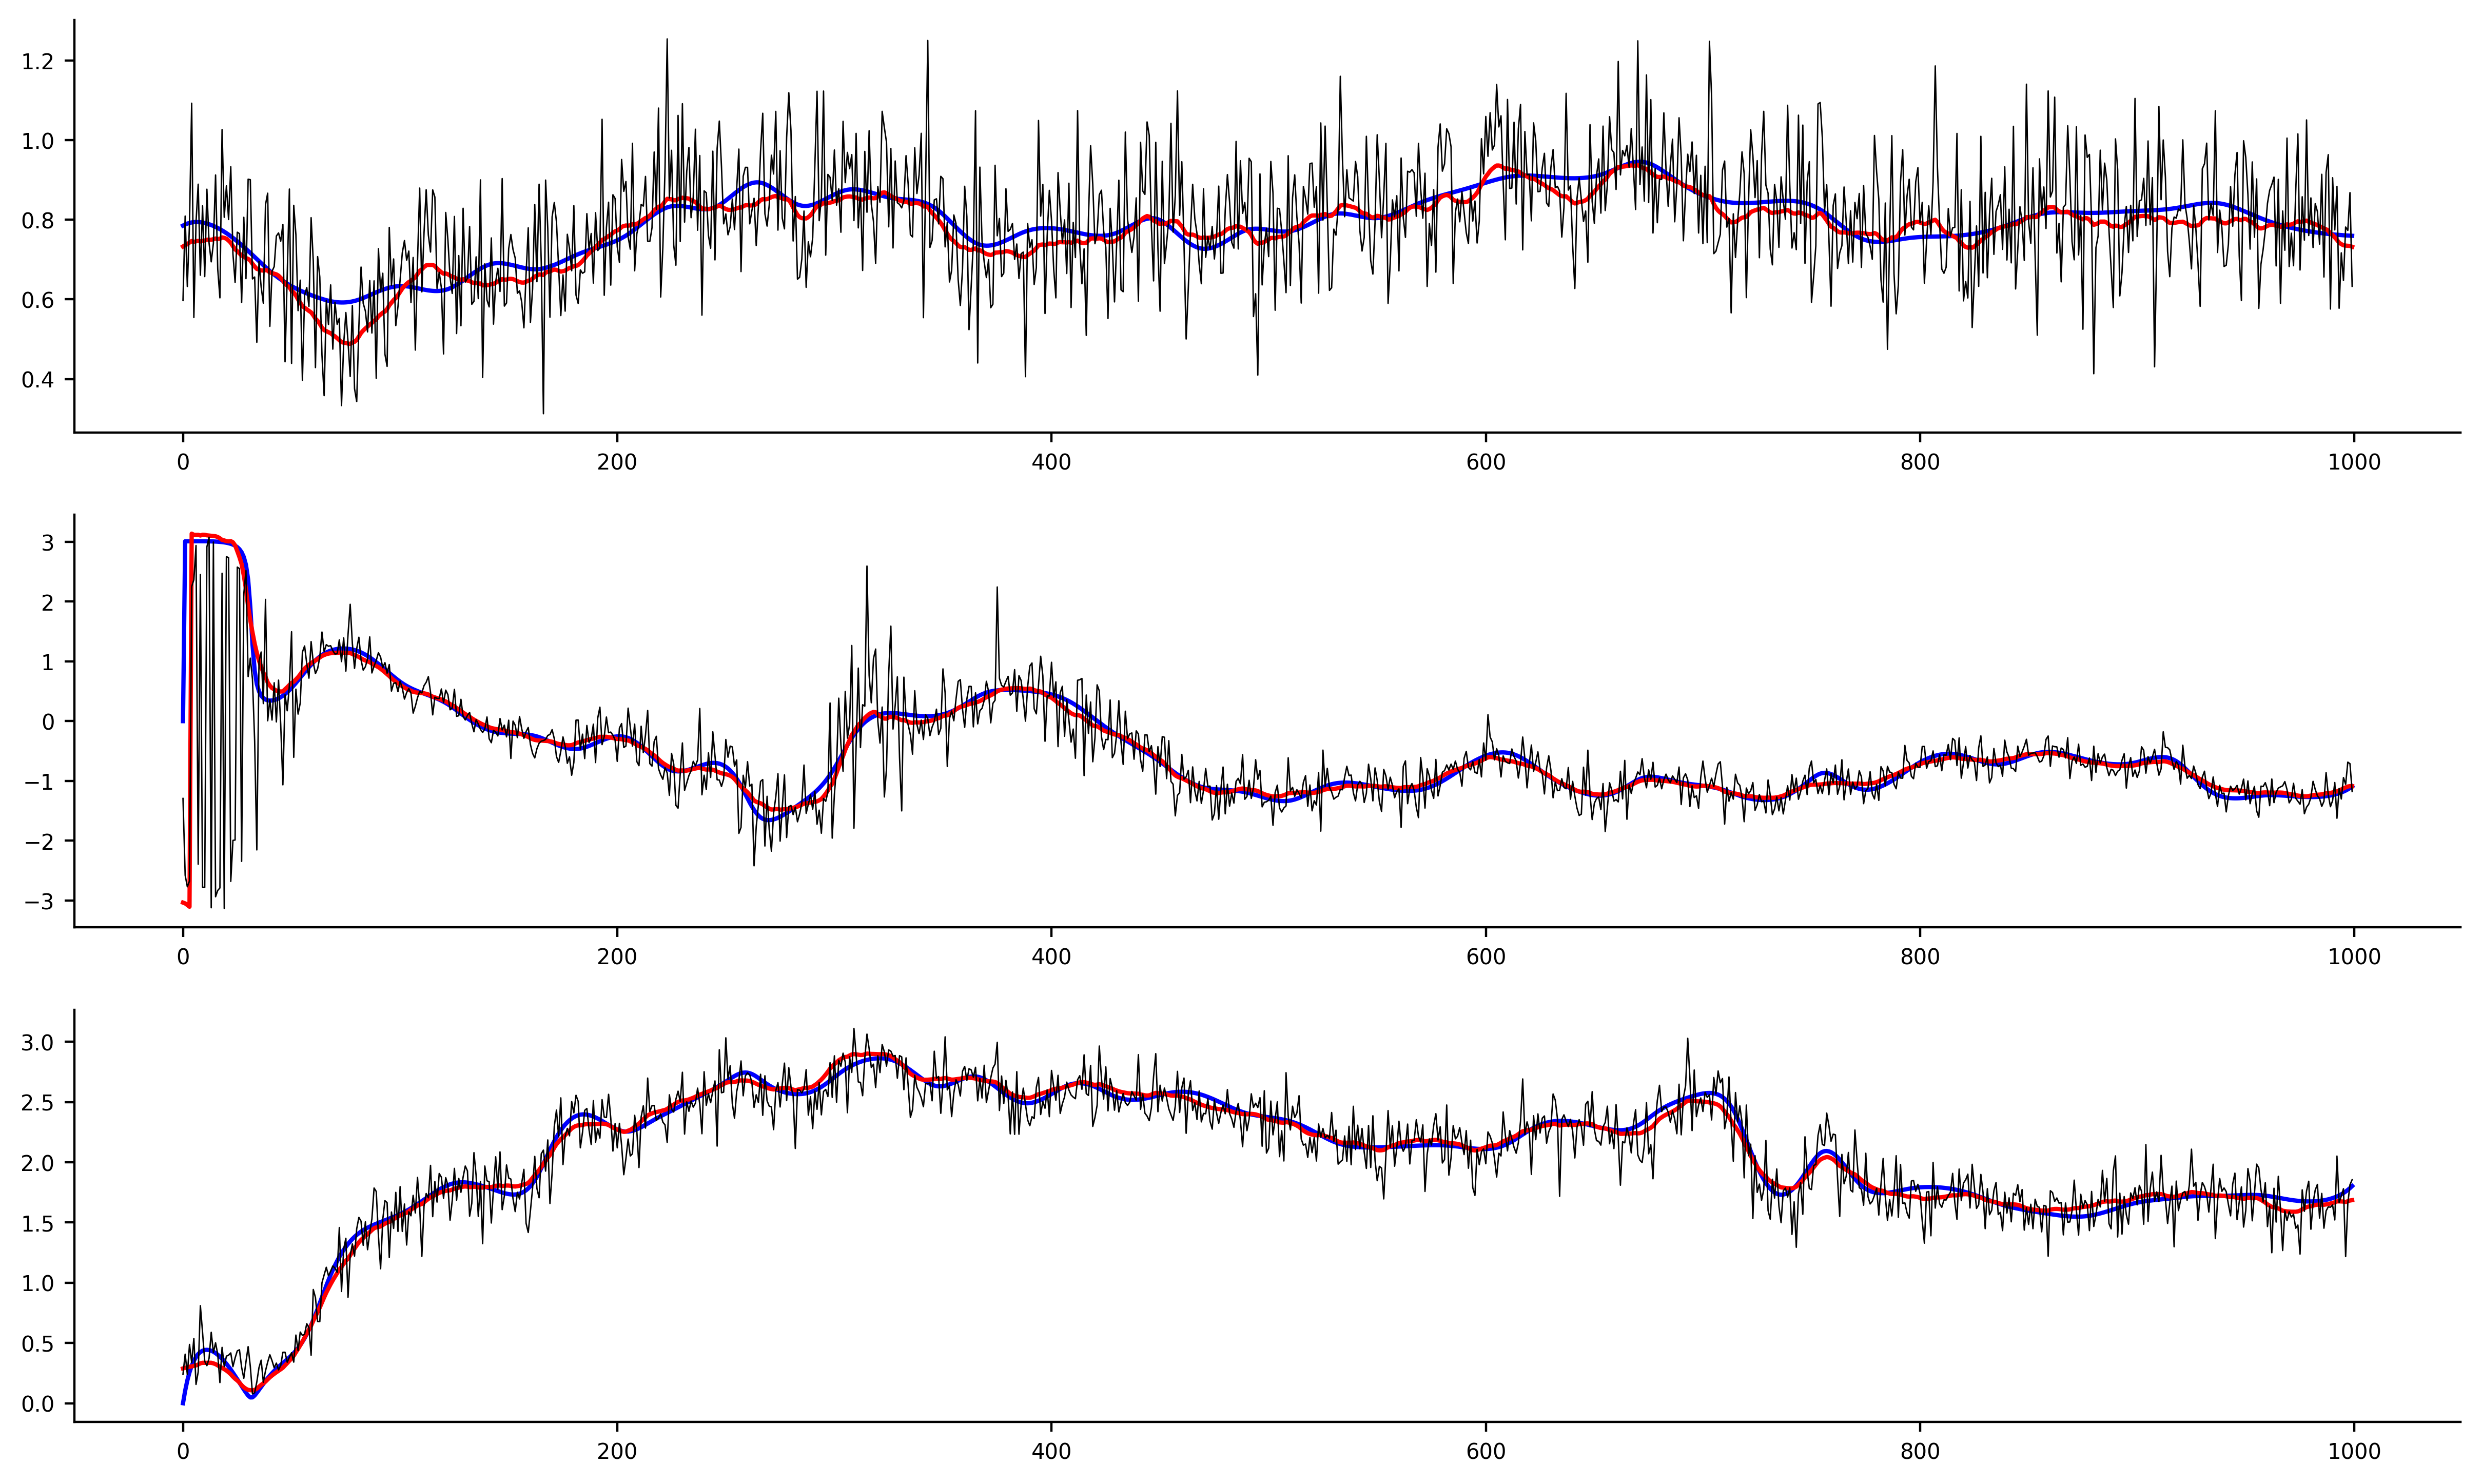

In [19]:
relaxed_tikhonov_sphere.plotSO3(Noise_trans, Data_trans, qq)

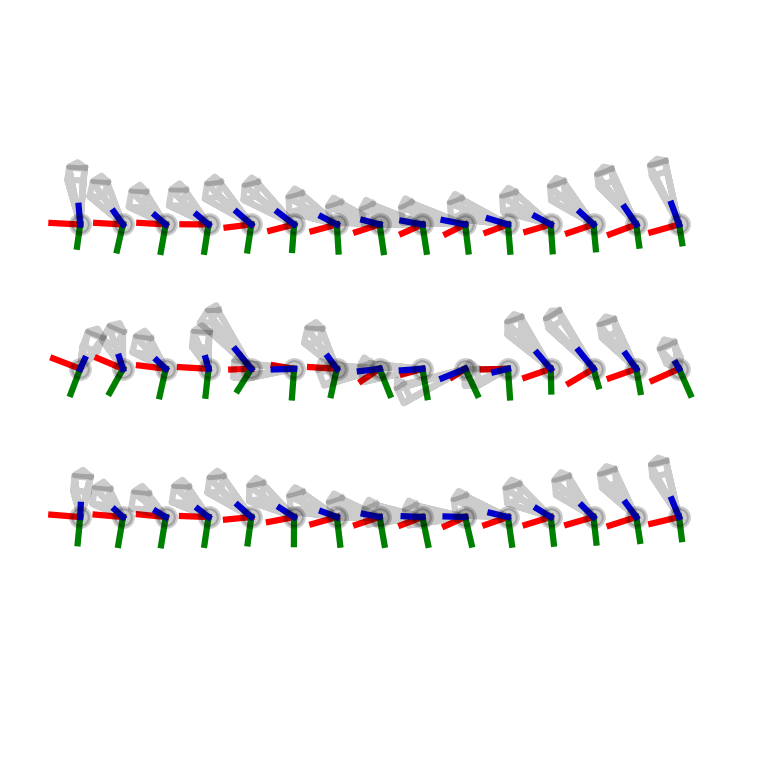

In [20]:
relaxed_tikhonov_sphere.plotSO3_camera(Noise_trans, Data_trans, qq)